# Data Storytelling

### Background
For the first time, Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. The survey received over 16,000 responses and we learned a ton about who is working with data, what’s happening at the cutting edge of machine learning across industries, and how new data scientists can best break into the field

More information on survey found at https://www.kaggle.com/kaggle/kaggle-survey-2017

*In this Jupyter notebook, we will be dealing with data pertaining to a survey performed by Kaggle platform and answering few of the questions and possibily find answers to our questions. We will try to tell a pose questions as an aspirant of data science and find answers using data.*

### Content
The data includes 5 files:

1. schema.csv: a CSV file with survey schema. This schema includes the questions that correspond to each column name in both the multipleChoiceResponses.csv and freeformResponses.csv.
2. multipleChoiceResponses.csv: Respondents' answers to multiple choice and ranking questions. These are non-randomized and thus a single row does correspond to all of a single user's answers. -freeformResponses.csv: Respondents' freeform answers to Kaggle's survey questions. These responses are randomized within a column, so that reading across a single row does not give a single user's answers.
3. conversionRates.csv: Currency conversion rates (to USD) as accessed from the R package "quantmod" on September 14, 2017
4. RespondentTypeREADME.txt: This is a schema for decoding the responses in the "Asked" column of the schema.csv file.

In [52]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd

## Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot parameters
#plt.rcParams["figure.figsize"] = (20,10)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.3)

## 
%matplotlib inline

In [3]:
## Loading libraries

# cvRates = pd.read_csv('../input/conversionRates.csv', encoding="ISO-8859-1")
# freeForm = pd.read_csv('../input/freeformResponses.csv', encoding="ISO-8859-1")
# data = pd.read_csv('../input/multipleChoiceResponses.csv', encoding="ISO-8859-1")
# schema = pd.read_csv('../input/schema.csv', encoding="ISO-8859-1")


df = pd.read_csv('multipleChoiceResponses.csv', encoding="ISO-8859-1")
freeform = pd.read_csv('freeformResponses.csv', encoding="ISO-8859-1")
schema = pd.read_csv('schema.csv', encoding="ISO-8859-1")
cvrates = pd.read_csv('conversionRates.csv', encoding="ISO-8859-1")

/Users/bobbyvegi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bobbyvegi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,17,21,38,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
## Examining data sets
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


multipleChoiceResponses data contains, responses to set of multiple choice questions. 

In [5]:
## Checking Null entries in the data
print('Numeber of respondents and questions {}:'.format(df.shape))
print('-------------------------------------------------------------')
print('Percentage of no responses per question shown below')

print(df.isnull().sum() *100/
      (df.shape[0]))

print('-------------------------------------------------------------')
print('Total percenatge of no responses to any of the quesions {}'.format((df.isnull().sum().sum() * 100)/
                                                                          (df.shape[0]*df.shape[1])))

Numeber of respondents and questions (16716, 228):
-------------------------------------------------------------
Percentage of no responses per question shown below
GenderSelect                                0.568318
Country                                     0.723857
Age                                         1.980139
EmploymentStatus                            0.000000
StudentStatus                              92.342666
LearningDataScience                        92.318737
CodeWriter                                 21.117492
CareerSwitcher                             81.981335
CurrentJobTitleSelect                      29.229481
TitleFit                                   31.179708
CurrentEmployerType                        30.599426
MLToolNextYearSelect                       34.206748
MLMethodNextYearSelect                     35.193826
LanguageRecommendationSelect               34.206748
PublicDatasetsSelect                       35.415171
LearningPlatformSelect                  

We see that they are total of 75% missing reponses in the data set. This may be due to the fact that the vast amount of questions a respondent is asked to answer.
However, Few of the questions/columns have more than 75% and few columns such as Gender, Age etc., have less than 1%

Before Jumping into visualizing in Python, we could use tableau to quickly generate few visualizations to kick start this data story telling project


# Where are survey participants from?

In [6]:
%%HTML
<div class='tableauPlaceholder' id='viz1522031918939' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;QT&#47;QTCF9DRQF&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;QTCF9DRQF' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;QT&#47;QTCF9DRQF&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522031918939');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### *From the plot, we can infer that Majority of participants are from United States and India. With highest number of participants from United States.*

# What the age distribution?

In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1522032618990' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataStoryTellingKagglesurvey&#47;AgeDistribution&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DataStoryTellingKagglesurvey&#47;AgeDistribution' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataStoryTellingKagglesurvey&#47;AgeDistribution&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522032618990');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### *We hear how fast data science is growing, this plot supports that argument. From the plot, we can infer that approx. 58% participants are in the age group 20 to 30 which is relatively younger group. And one virtue of emerging career is low age group(young people pursuing) such as the age group in the above plot. In summary, we can infer that young age group is pursuing or interested in data science*

# What's the employment status?

In [8]:
%%HTML
<div class='tableauPlaceholder' id='viz1522032953867' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataStoryTellingKagglesurvey&#47;Employmentstatus&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DataStoryTellingKagglesurvey&#47;Employmentstatus' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataStoryTellingKagglesurvey&#47;Employmentstatus&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522032953867');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### *Approx. 68% of the participants are working, 14% are looking for jobs and approx. 8% are self employed or contract workers. This is a useful stat as nearly 90% participants  are either working or looking for employment. Thus it can be infered that answers to the data science questions in the survey are result from work experience, experience looking for jobs and engaging in the data science community. *

# What's the participants Formal Education?

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1522033219062' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataStoryTellingKagglesurvey&#47;FormalEducation&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DataStoryTellingKagglesurvey&#47;FormalEducation' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataStoryTellingKagglesurvey&#47;FormalEducation&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522033219062');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### *People looking for job in data science come across common question, do we need to have PhD degree in order to get data science role. From the survey, we see that nearly 74% have bachelor's or Master's degree and 16% with PhD. Well one we know, you do not need a PhD to get a data science position.*

# Major ?

In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1522033580400' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataStoryTellingKagglesurvey&#47;Major&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DataStoryTellingKagglesurvey&#47;Major' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DataStoryTellingKagglesurvey&#47;Major&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522033580400');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### *Other common question data science aspirants have is, Do you need to be Computer science major? From the plot, we see that 34% participants have computer science as major. However, 66% do not have a computer science major. That is it is good to have computer science major but it is not the absolute thing. Also interesting, approx. 50% have major not related to computer science or maths and stats. This for me is really interesting stat as it conveys data science can be pursured by practically any major abeit having right skills*

# What's the typical size of data ?

In [11]:
%%HTML
<div class='tableauPlaceholder' id='viz1522033867938' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WM&#47;WMZQZ9NTD&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;WMZQZ9NTD' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WM&#47;WMZQZ9NTD&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522033867938');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### *We all know data science deals with data but ever wondered what's typical size of the data people working on data deal with? Here's an answer to the question. Nearly 73% of the people, work with data size less that 10GB and nearly 95% deal with data less than 10TB.*

In [12]:
def col_list_to_valuecount(column_name, data = df, col_entry_list = True, to_print = True):
    """
    Function to generates value counts from columns which have entires as list of elements.
    column_name: Name of the column
    data = data 
    col_entry_list = True if the column has entries as list of elements
    """
    if col_entry_list == True:
        x = data[column_name].str.split(',').apply(lambda x: pd.Series(x).value_counts(ascending=True)).sum()
        x = x[x.index != 'Other (please specify; separate by semi-colon)'].sort_values(ascending=False)
        x = round(x * 100 / sum(x),2)
    else:
        x = data[column_name].value_counts()
        x = round(x * 100 / sum(x),2).head(15)
    if to_print == True: print(x)
    return x


def barplot_seaborn(x_axis, y_axis, title = 'title', xlabel = 'label', ylabel ='label', 
                    have_xlab = False, have_ylab = False, font_scale= 1.3):
    """
    Function to plot bar plot of value counts obtained from 'col_list_to_valuecount' function.
    """

    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set(font_scale= font_scale)
    sns.barplot(y= y_axis[0:10], x= x_axis[0:10], palette= 'Greens_r')
    plt.title(title)
    if (have_xlab == True):
        plt.xlabel(xlabel)
        
    if have_ylab == True:
        plt.ylabel(ylabel)
        
    plt.show()

# Type of Data

In [13]:
# obtain value counts

print('Percentage of different data types used')
print(50 * '-')
data_type = col_list_to_valuecount('WorkDataTypeSelect')

Percentage of different data types used
--------------------------------------------------
Relational data    43.09
Text data          34.88
Image data         11.94
Other               6.75
Video data          3.35
dtype: float64


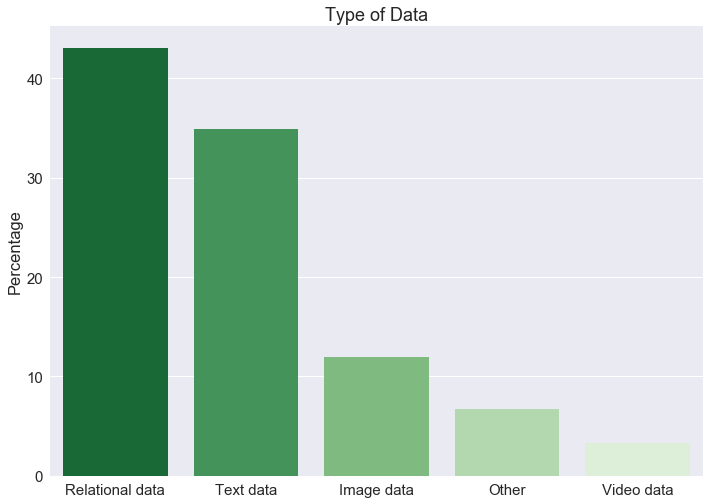

In [14]:
## Plot
barplot_seaborn(data_type.index,data_type,title='Type of Data', 
                ylabel='Percentage', have_ylab=True, font_scale=1.5)

#### *Wondered what type of data people who analyze data work on? We see from the plot, Relational and text data type comprises of around approx. 78% of the data type worked on which is followed by image data. This indirectly also points how useful for a data science aspirant to have skills in working with relational databases such as SQL*

# Where do you get public datasets?

In [15]:
# 
print('Percentage of platform to find public datasets to practise data science skills')
print(50 * '-')
data_type = col_list_to_valuecount('PublicDatasetsSelect')

Percentage of platform to find public datasets to practise data science skills
--------------------------------------------------
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)    32.97
Google Search                                                                 17.35
University/Non-profit research group websites                                 13.84
I collect my own data (e.g. web-scraping)                                     12.33
GitHub                                                                        11.56
Government website                                                            10.02
Other                                                                          1.92
dtype: float64


In [16]:
data_type = data_type.rename(index = { "I collect my own data (e.g. web-scraping)" : 'Collects Own Data',
                                      "Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)": 
                                      "Dataset aggregator/platform"})

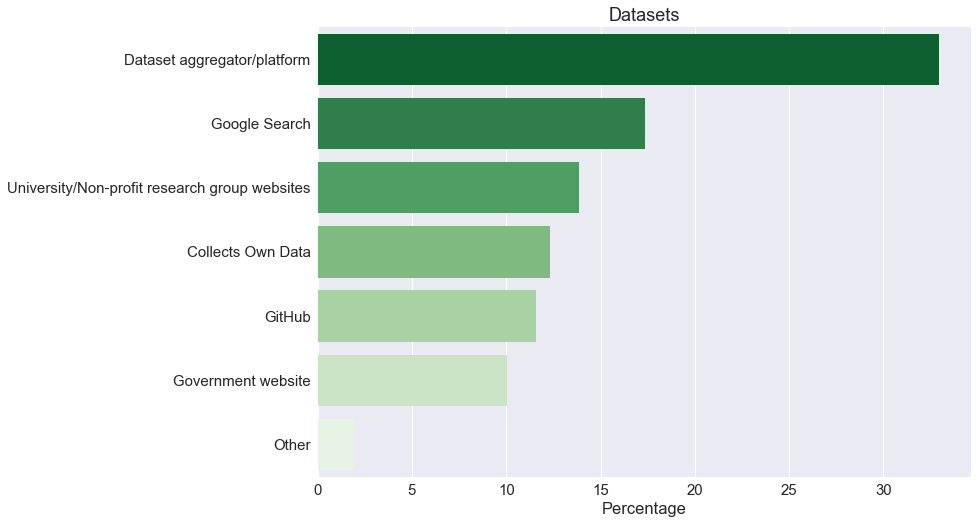

In [17]:
## Plot
barplot_seaborn(data_type,data_type.index,title='Datasets', xlabel='Percentage', have_xlab=True, font_scale=1.5)

#### *When asked Where do you find public datasets to practice data science skills? *
#### *Nearly 87% get data from some platform( government website, kaggle etc) and 13% actually collect own data. This is interesting as one who possess webscraping skills(collect own data) can stand out from the crowd*


# Language of Data Science

In [18]:
print('Language recommeded')
print(50 * '-')
lang_recom = col_list_to_valuecount('LanguageRecommendationSelect', col_entry_list= False)

Language recommeded
--------------------------------------------------
Python      63.11
R           24.03
SQL          3.50
C/C++/C#     2.79
Matlab       2.16
Java         1.25
Scala        0.85
SAS          0.80
Other        0.77
Julia        0.27
Stata        0.25
Haskell      0.15
F#           0.04
Name: LanguageRecommendationSelect, dtype: float64


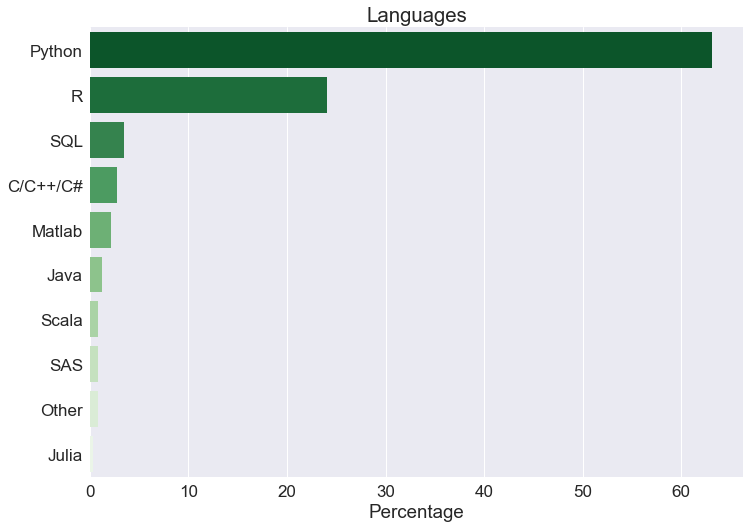

In [19]:
barplot_seaborn(lang_recom, lang_recom.index,have_xlab=True, xlabel="Percentage", 
                title="Languages", font_scale=1.7)

#### *Clearly, Python dominates the language of data science list. 90% of the responses recommend that data science aspirants learn python, R and SQL skills*

In [20]:
print('Time learning data science')
print(50 * '-')
time_ds = col_list_to_valuecount('LearningDataScienceTime', col_entry_list= False)

Time learning data science
--------------------------------------------------
< 1 year       48.13
1-2 years      36.01
3-5 years      12.42
5-10 years      2.44
15+ years       0.69
10-15 years     0.32
Name: LearningDataScienceTime, dtype: float64


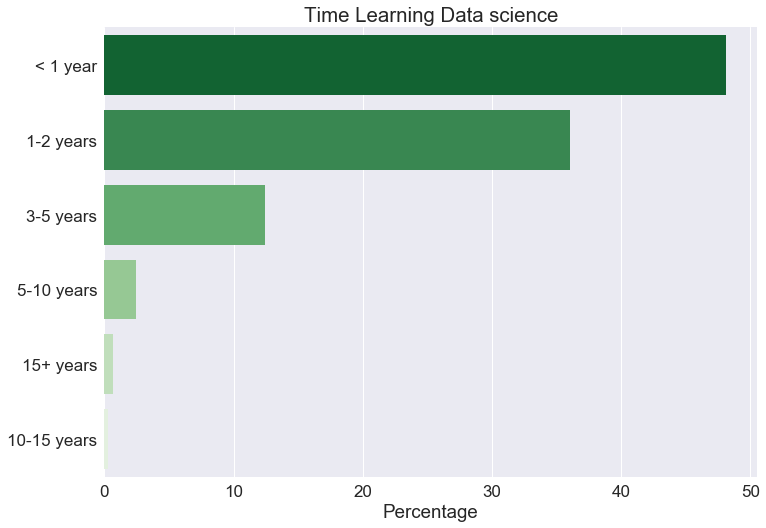

In [21]:
barplot_seaborn(time_ds, time_ds.index,have_xlab=True, xlabel="Percentage", 
                title="Time Learning Data science", font_scale=1.7)

#### *Nearly 85% responses from learners(students, people looking for career transition etc) indicate that they have been learning data science for less than 2 years. This again shows that data science is a relatively newer field when compared with software engineering, autonomous vehicles etcs. *

# Machine Learning Skill

In [22]:
print('Machine learning skill respondents consider competent ')
print(50 * '-')
MLSkill = col_list_to_valuecount('MLSkillsSelect')

Machine learning skill respondents consider competent 
--------------------------------------------------
Supervised Machine Learning (Tabular Data)    26.02
Unsupervised Learning                         13.95
Time Series                                   13.51
Natural Language Processing                   10.05
Outlier detection (e.g. Fraud detection)       8.33
Computer Vision                                8.15
Recommendation Engines                         7.33
Survival Analysis                              4.17
Reinforcement learning                         3.41
Adversarial Learning                           1.91
Speech Recognition                             1.75
Machine Translation                            1.43
dtype: float64


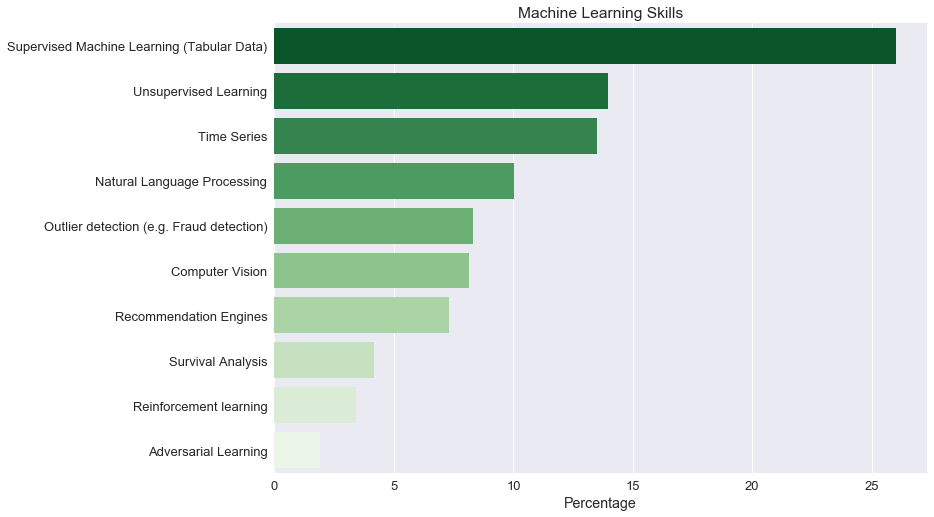

In [23]:
barplot_seaborn(x_axis = MLSkill, y_axis= MLSkill.index, title='Machine Learning Skills', 
                xlabel='Percentage', have_xlab= True)

#### *When asked in which machine learning skills respondents are competent in, 50% of the responses indicate to be competent in supervised, unsupervised and time series skills. We can also see the full list of skills respondents are competent in*


# Machine Learning Techniques

In [24]:
print('Machine learning techniques respondents consider competent ')
print(50 * '-')
MLtech = col_list_to_valuecount('MLTechniquesSelect')

Machine learning techniques respondents consider competent 
--------------------------------------------------
Logistic Regression                           18.19
Decision Trees - Random Forests               14.65
Support Vector Machines (SVMs)                10.81
Decision Trees - Gradient Boosted Machines    10.36
Bayesian Techniques                            9.14
Neural Networks - CNNs                         8.97
Ensemble Methods                               7.42
Gradient Boosting                              5.79
Neural Networks - RNNs                         5.23
Hidden Markov Models HMMs                      3.17
Evolutionary Approaches                        2.32
Neural Networks - GANs                         2.22
Markov Logic Networks                          1.72
dtype: float64


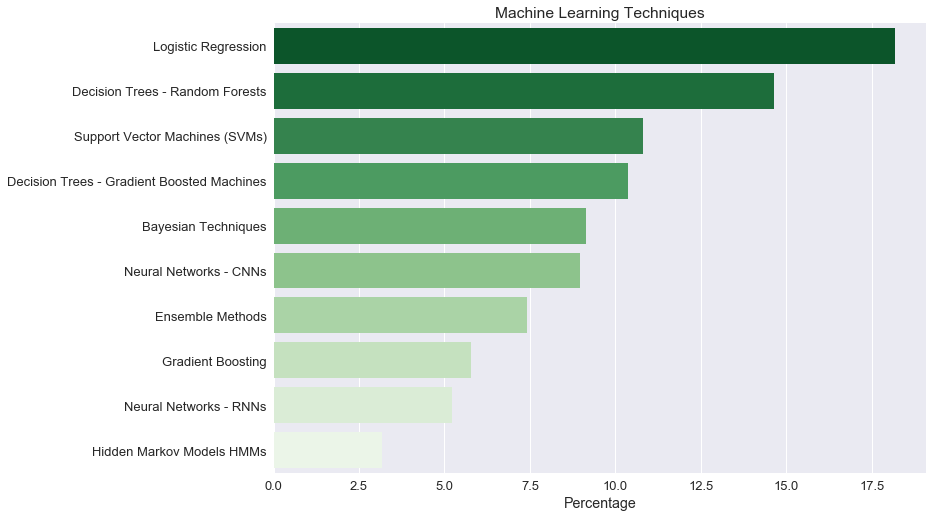

In [25]:
barplot_seaborn(x_axis = MLtech, y_axis= MLtech.index, title='Machine Learning Techniques', 
                xlabel='Percentage', have_xlab= True)

#### *When asked in which machine learning techniques respondents are competent in, 50% of the responses indicate to be competent in Logistic, Decision tree ( random forest, gradient boosted machines) and SVM. Full list of techniques can also be seen from the plot*

# At work, Algorithms?

Algorithms used at work
--------------------------------------------------
Regression/Logistic Regression    17.40
Decision Trees                    13.66
Random Forests                    12.68
Neural Networks                   10.29
Bayesian Techniques                8.39
Ensemble Methods                   7.80
SVMs                               7.31
Gradient Boosted Machines          6.54
CNNs                               5.19
RNNs                               3.36
Other                              2.29
Evolutionary Approaches            1.52
HMMs                               1.47
Markov Logic Networks              1.33
GANs                               0.78
dtype: float64


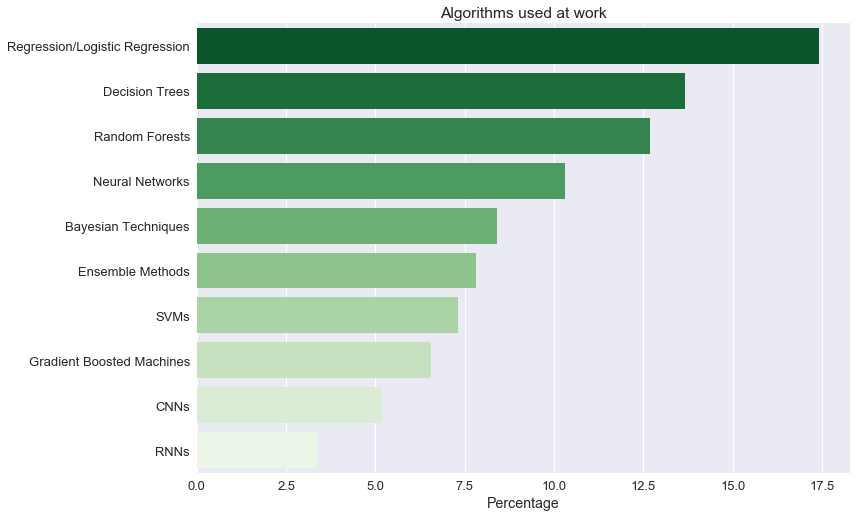

In [26]:
print('Algorithms used at work')
print(50 * '-')
Work_algo = col_list_to_valuecount('WorkAlgorithmsSelect')

barplot_seaborn(x_axis = Work_algo, y_axis= Work_algo.index, title='Algorithms used at work', 
                xlabel='Percentage', have_xlab= True)

#### *Respondents who are working mentioned at majority(nearly 50%) of algorithms they used at work include Regression/Logistic regression, Decision Tree, Random Forest and Neural Netrworks.*

# Algorithm Understanding Level

Level of algorithm understanding 
--------------------------------------------------
Enough to explain the algorithm to someone non-technical                                38.48
Enough to code it again from scratch, albeit it may run slowly                          23.78
Enough to run the code / standard library                                               12.44
Enough to refine and innovate on the algorithm                                          11.28
Enough to tune the parameters properly                                                   9.64
Enough to code it from scratch and it will run blazingly fast and be super efficient     4.39
Name: AlgorithmUnderstandingLevel, dtype: float64


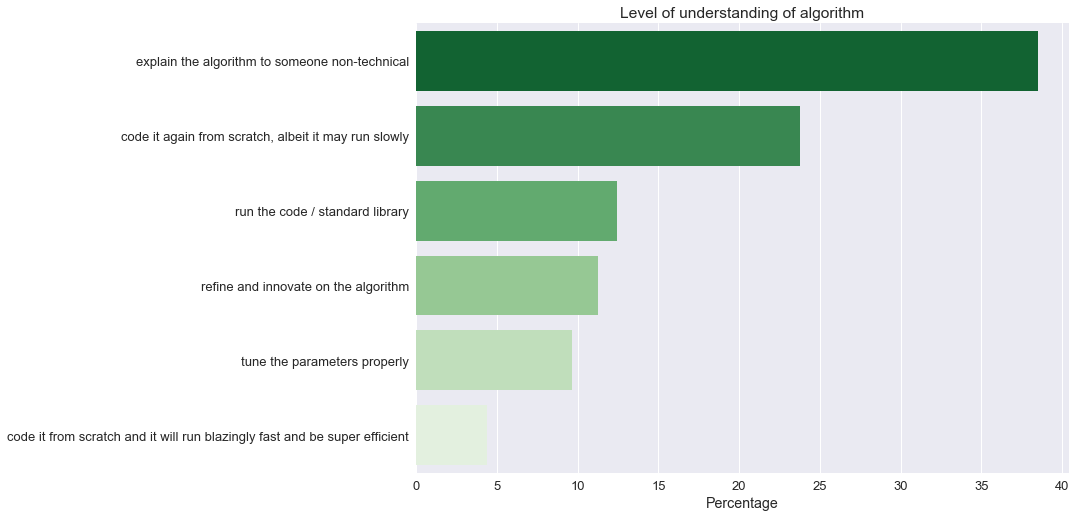

In [27]:
print('Level of algorithm understanding ')
print(50 * '-')
algo_under = col_list_to_valuecount('AlgorithmUnderstandingLevel', col_entry_list=False)

barplot_seaborn(x_axis = algo_under, y_axis= [x[10:] for x in algo_under.index], 
                title='Level of understanding of algorithm', 
                xlabel='Percentage', have_xlab= True)

#### *While they are many algorithms in the realm of data science, one common question prevails. What is the level of understanding one should have in algorithms? When this question was asked to respondents who analyze data using code, Majority(~39%) responded that one has to be able to explain algorithm to non-technical person while (~23%) responded that one has to code from scratch, albeit the algorithm might run slowly. Based on this we can infer that potential data science aspirant should be able to explain algorithm to non-technical person and be able to code from scratch*

# At work, Tools?

Tools used at work
--------------------------------------------------
Python                                                13.43
R                                                     10.41
SQL                                                    9.42
Jupyter notebooks                                      7.09
TensorFlow                                             4.99
Amazon Web services                                    4.13
Unix shell / awk                                       4.10
Tableau                                                3.58
C/C++                                                  3.38
NoSQL                                                  3.38
MATLAB/Octave                                          3.23
Java                                                   3.21
Hadoop/Hive/Pig                                        3.05
Spark / MLlib                                          3.01
Microsoft Excel Data Mining                            2.40
Other                         

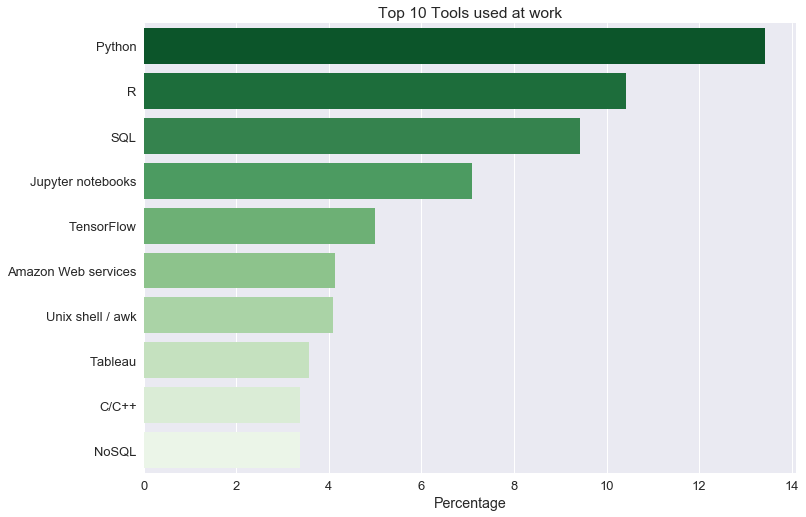

In [28]:
print('Tools used at work')
print(50 * '-')
Work_tools = col_list_to_valuecount('WorkToolsSelect')

barplot_seaborn(x_axis = Work_tools, y_axis= Work_tools.index, title='Top 10 Tools used at work', 
                xlabel='Percentage', have_xlab= True)

#### *In the above plot, we see the top 10 tools used at work. We see *  
1. programming languages such as Python, R ,C/C++, 
2. Deep learning platform tensorflow, AWS, 
3. visualization tool: Tableau
4. Databases: SQL, NOSQL
5. IDE: Jupyter notebook 

# At Work, Data Science methods?

Methods used at work
--------------------------------------------------
Data Visualization                  8.44
Logistic Regression                 7.21
Cross-Validation                    6.50
Decision Trees                      6.21
Random Forests                      5.81
Time Series Analysis                5.30
Neural Networks                     4.72
PCA and Dimensionality Reduction    4.69
kNN and Other Clustering            4.41
Text Analytics                      4.04
Ensemble Methods                    3.46
Segmentation                        3.45
SVMs                                3.32
Natural Language Processing         3.28
A/B Testing                         3.25
Bayesian Techniques                 3.22
Naive Bayes                         3.20
Gradient Boosted Machines           2.62
CNNs                                2.38
Simulation                          2.35
Recommender Systems                 1.95
Association Rules                   1.93
RNNs                      

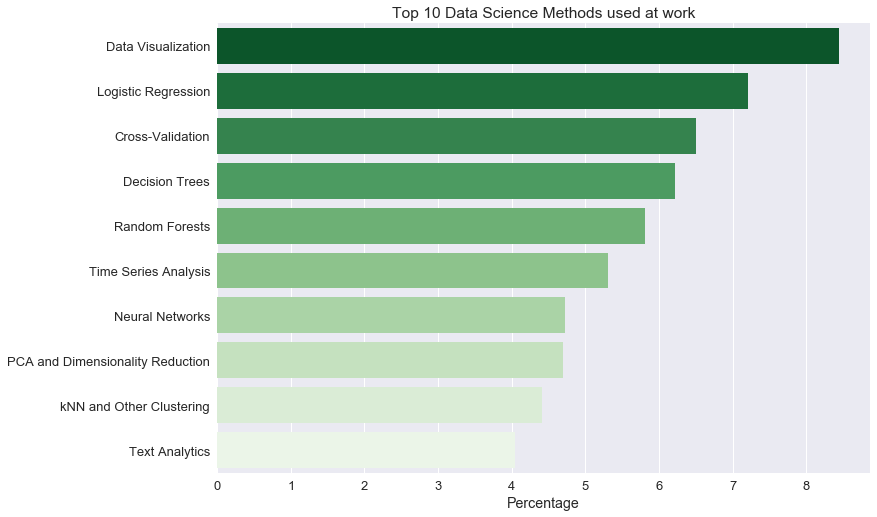

In [29]:
print('Methods used at work')
print(50 * '-')
Work_method = col_list_to_valuecount('WorkMethodsSelect')

barplot_seaborn(x_axis = Work_method, y_axis= Work_method.index, title='Top 10 Data Science Methods used at work', 
                xlabel='Percentage', have_xlab= True)

#### *The above plot shows top 10 methods used at work.*

### Now, we will explore what's the average percentage of time spent in various tasks at work such as collecting data, visualization, finding insights and model building

# At work, Time to collect data?

In [30]:
%%HTML
<div class='tableauPlaceholder' id='viz1522054294663' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Y9&#47;Y9HWT7D35&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;Y9HWT7D35' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Y9&#47;Y9HWT7D35&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522054294663');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [31]:
print("Mean average percentage time spent visualizing: ",round(np.mean(df.TimeGatheringData),2),"%")
print("Standard Deviation of average percentage time spent visualizing: ", round(np.std(df.TimeGatheringData),2),"%")

Mean average percentage time spent visualizing:  36.14 %
Standard Deviation of average percentage time spent visualizing:  21.65 %


#### *Percentage time spent collecting data appears to be right skewed bi-modal distribution with two modes at 30% and 50%. We see majority of people(~80%) spend less than 50% of time of collecting data.*

# At Work, Time spent finding insights

In [32]:
%%HTML
<div class='tableauPlaceholder' id='viz1522054398167' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;B3&#47;B3S4CB8FG&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;B3S4CB8FG' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;B3&#47;B3S4CB8FG&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522054398167');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [33]:
print("Mean average percentage time spent visualizing: ",round(np.mean(df.TimeFindingInsights),2),"%")
print("Standard Deviation of average percentage time spent visualizing: ", round(np.std(df.TimeFindingInsights),2),"%")

Mean average percentage time spent visualizing:  13.09 %
Standard Deviation of average percentage time spent visualizing:  12.97 %


#### *Percentage of time spent drawing insights from the data is right skewed centered  in the range 10-20%*

# At Work, Time spent visualization

In [34]:
%%HTML
<div class='tableauPlaceholder' id='viz1522055177515' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KW&#47;KW82SPRFG&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;KW82SPRFG' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KW&#47;KW82SPRFG&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522055177515');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [35]:
print("Mean average percentage time spent visualizing: ",round(np.mean(df.TimeVisualizing),2),"%")
print("Standard Deviation of average percentage time spent visualizing: ", round(np.std(df.TimeVisualizing),2),"%")

Mean average percentage time spent visualizing:  13.87 %
Standard Deviation of average percentage time spent visualizing:  11.72 %


#### *Percentage of time spent on visualization is right skewed centered  at in the range 10-20% and nearly entire population spending less than 30% of the time.*

# At Work, Time spent in model building

In [36]:
%%HTML
<div class='tableauPlaceholder' id='viz1522054766042' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;3X&#47;3XJM9XF6Z&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;3XJM9XF6Z' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;3X&#47;3XJM9XF6Z&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522054766042');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [37]:
print("Mean average percentage time spent in model building: ",round(np.mean(df.TimeModelBuilding),2),"%")
print("Standard Deviation of average percentage time spent in model building: ", 
      round(np.std(df.TimeModelBuilding),2),"%")

Mean average percentage time spent in model building:  21.27 %
Standard Deviation of average percentage time spent in model building:  16.16 %


# At Work, Time spent production

### Average percentage time spent on putting work to production

In [38]:
%%HTML
<div class='tableauPlaceholder' id='viz1522054814436' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RC&#47;RCJXNSMSG&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;RCJXNSMSG' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RC&#47;RCJXNSMSG&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522054814436');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [39]:
print("Mean average percentage time spent in production: ",round(np.mean(df.TimeProduction),2),"%")
print("Standard Deviation of average percentage time spent in production: ", round(np.std(df.TimeProduction),2),"%")

Mean average percentage time spent in production:  10.81 %
Standard Deviation of average percentage time spent in production:  12.26 %


# At work, code sharing?

Sharing code at work
--------------------------------------------------
Git                                                                   40.31
Generic non-cloud file sharing software (Email/Shared Server/etc.)    19.23
Generic cloud file sharing software (Dropbox/Box/etc.)                13.70
Bitbucket                                                             12.44
Subversion                                                             6.88
Other                                                                  6.33
Mercurial                                                              1.11
dtype: float64


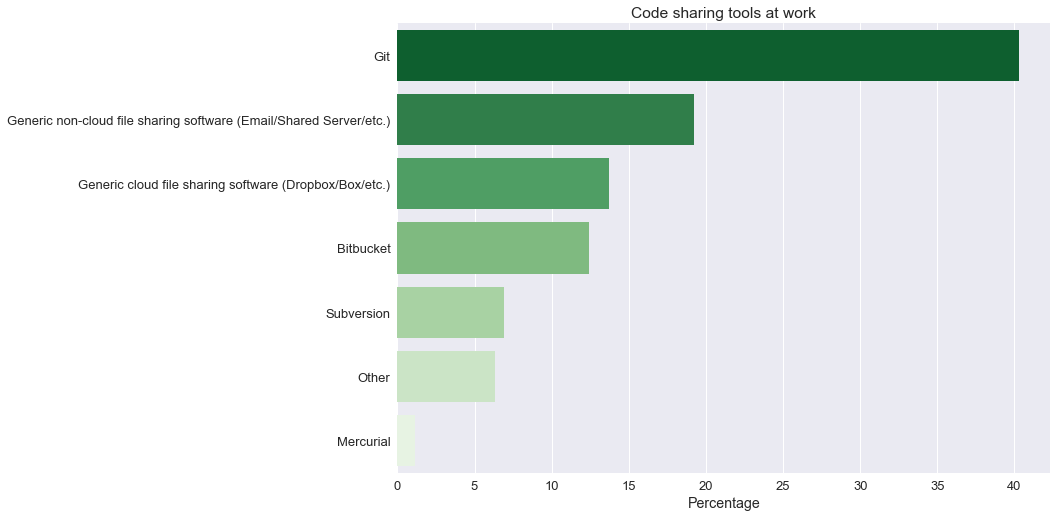

In [40]:
print('Sharing code at work')
print(50 * '-')
Work_code = col_list_to_valuecount('WorkCodeSharing')

barplot_seaborn(x_axis = Work_code, y_axis= Work_code.index, title='Code sharing tools at work', 
                xlabel='Percentage', have_xlab= True)

# At work, Data storage models?

In [41]:
print('Data storage models at work')
print(50 * '-')
Work_data_storage = col_list_to_valuecount('WorkDataStorage', to_print = False)

Work_data_storage = Work_data_storage.rename({
    "Flat files not in a database or cache (e.g. CSV" : "Flat files not in a database or cache",
    " XML":"Flat files not in a database or cache",
    " PNG":"Flat files not in a database or cache",
    " MPG)":"Flat files not in a database or cache",
    " JSON":"Flat files not in a database or cache"}
)

Work_data_storage = Work_data_storage.groupby(Work_data_storage.index).sum().sort_values(ascending = False)
Work_data_storage

Data storage models at work
--------------------------------------------------


Flat files not in a database or cache                        72.10
Row-oriented relational (e.g. MySQL/Microsoft SQL Server)    12.18
Document-oriented (e.g. MongoDB/Elasticsearch)                4.52
Column-oriented relational (e.g. KDB/MariaDB)                 3.39
Other tabular (e.g. Cassandra/BigTable/BigQuery/Redshift)     3.19
Key-value store (e.g. Redis/Riak)                             2.01
Graph (e.g. GraphBase/Neo4j)                                  1.62
Other                                                         0.96
dtype: float64

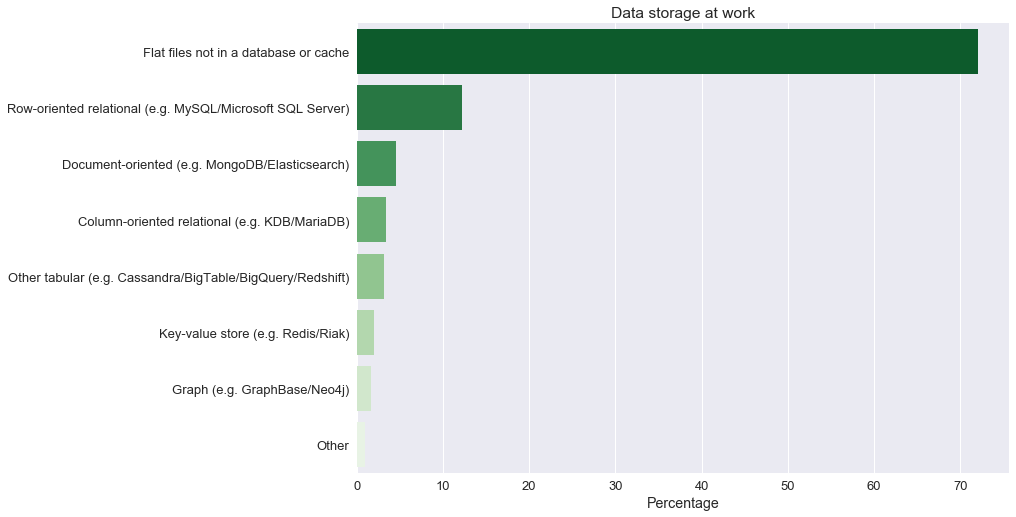

In [42]:
barplot_seaborn(x_axis = Work_data_storage, y_axis= Work_data_storage.index, title='Data storage at work', 
                xlabel='Percentage', have_xlab= True)

# At work, Data sharing?

In [43]:
print('Data sharing at work')
print(50 * '-')
Work_data_sharing = col_list_to_valuecount('WorkDataSharing')

Data sharing at work
--------------------------------------------------
Share Drive/SharePoint          22.39
Email                           20.84
Company Developed Platform      20.68
Commercial Data Platform        18.62
I don't typically share data    12.35
Other                            5.11
dtype: float64


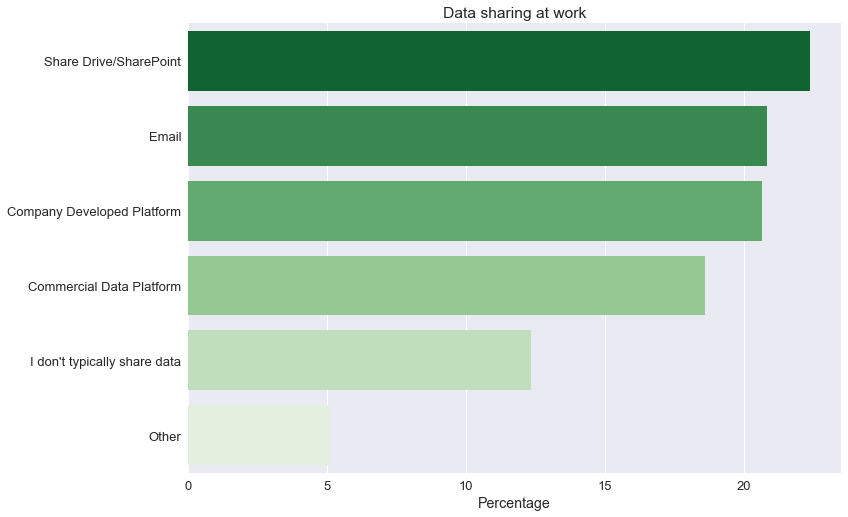

In [44]:
barplot_seaborn(x_axis = Work_data_sharing, y_axis= Work_data_sharing.index, title='Data sharing at work', 
                xlabel='Percentage', have_xlab= True)

# Learning Platform?

In [45]:
print('Learning platform')
print(50 * '-')
learning_platform = col_list_to_valuecount('LearningPlatformSelect')

Learning platform
--------------------------------------------------
Kaggle                           11.77
Online courses                   10.70
Stack Overflow Q&A               10.10
YouTube Videos                    9.37
Personal Projects                 8.63
Blogs                             8.55
Textbook                          7.52
College/University                6.02
Arxiv                             4.28
Official documentation            4.17
Conferences                       3.93
Friends network                   2.86
Tutoring/mentoring                2.58
Podcasts                          2.19
Non-Kaggle online communities     2.07
Newsletters                       1.97
Company internal community        1.76
Other                             0.92
Trade book                        0.60
dtype: float64


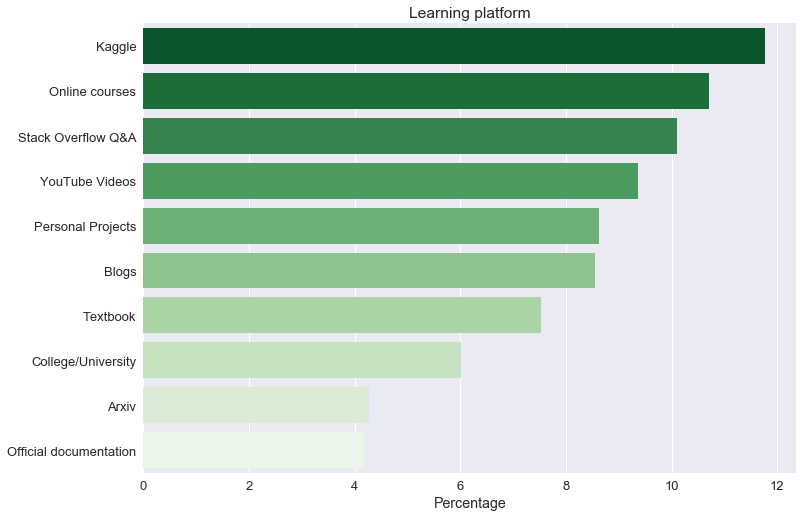

In [46]:
barplot_seaborn(x_axis = learning_platform[0:10], y_axis= learning_platform.index[0:10], title='Learning platform', 
                xlabel='Percentage', have_xlab= True)

# Next Year, Machine Learning tool you will learn?

ML Tool next year
--------------------------------------------------
TensorFlow                                            23.83
Python                                                15.58
R                                                      8.27
Spark / MLlib                                          6.86
Hadoop/Hive/Pig                                        3.79
Other                                                  3.70
Amazon Machine Learning                                3.56
Jupyter notebooks                                      3.26
I don't plan on learning a new tool/technology         3.10
Google Cloud Compute                                   2.69
Amazon Web services                                    2.48
Julia                                                  2.02
Microsoft Azure Machine Learning                       2.00
DataRobot                                              2.00
IBM Watson / Waton Analytics                           1.76
C/C++                          

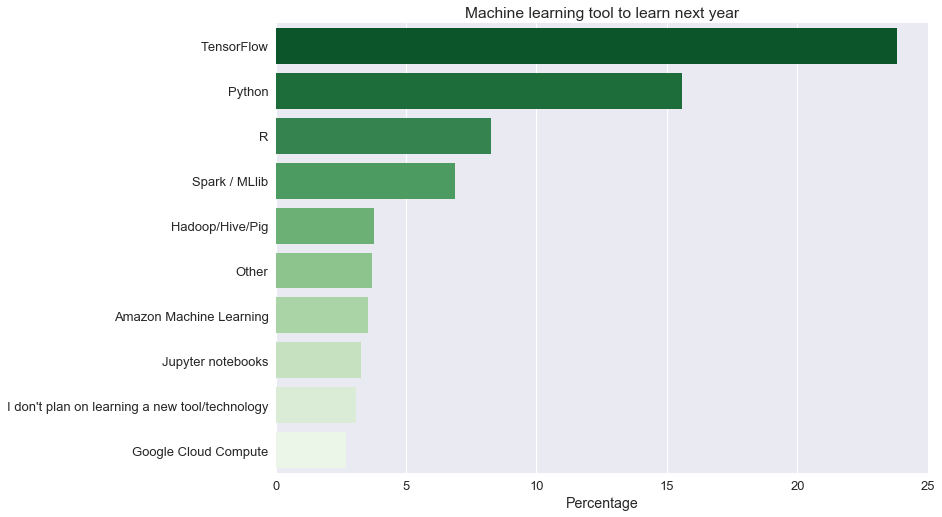

In [47]:
print('ML Tool next year')
print(50 * '-')
ML_nextyear = col_list_to_valuecount('MLToolNextYearSelect')

barplot_seaborn(x_axis = ML_nextyear[0:10], y_axis= ML_nextyear.index[0:10], title='Machine learning tool to learn next year', 
                xlabel='Percentage', have_xlab= True)

ML Method next year
--------------------------------------------------
Deep learning                                  39.29
Neural Nets                                    12.48
Time Series Analysis                            6.13
Ensemble Methods                                4.84
Bayesian Methods                                4.60
Text Mining                                     4.44
Genetic & Evolutionary Algorithms               3.83
Social Network Analysis                         3.28
Anomaly Detection                               2.77
Other                                           2.32
Monte Carlo Methods                             2.07
Regression                                      1.98
Cluster Analysis                                1.95
I don't plan on learning a new ML/DS method     1.76
Decision Trees                                  1.41
Random Forests                                  1.39
Support Vector Machines (SVM)                   1.32
Survival Analysis           

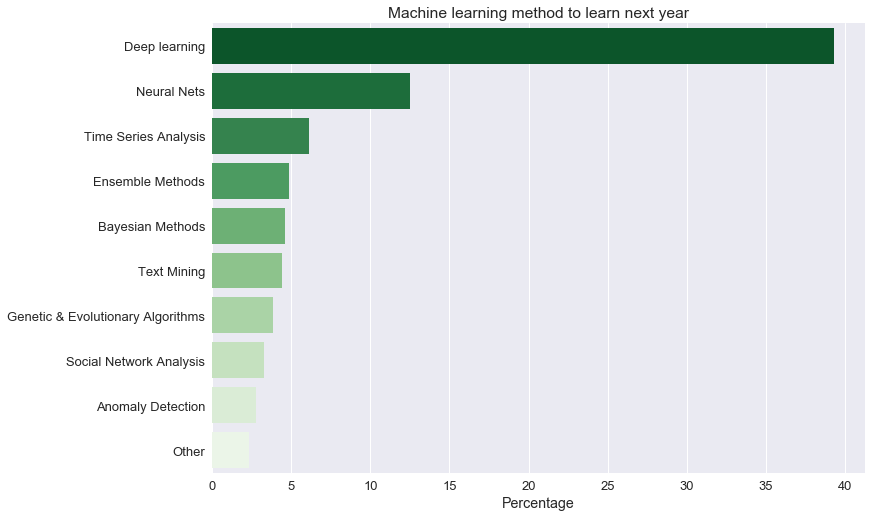

In [50]:
print('ML Method next year')
print(50 * '-')
ML_method_nextyear = col_list_to_valuecount('MLMethodNextYearSelect', to_print=False)

ML_method_nextyear = ML_method_nextyear.rename({
    "Ensemble Methods (e.g. boosting" : "Ensemble Methods",
    " bagging)": "Ensemble Methods"})

ML_method_nextyear = ML_method_nextyear.groupby(ML_method_nextyear.index).sum().sort_values(ascending=False)

print(ML_method_nextyear)

barplot_seaborn(x_axis = ML_method_nextyear[0:10], y_axis= ML_method_nextyear.index[0:10], 
                title='Machine learning method to learn next year', 
                xlabel='Percentage', have_xlab= True)

# Summary

*In summary, we started our notebook with demographics, gender distribution, formal education and major of survey respondents. we later moved on to answering question about programming language used in data science, Machine Learning(ML) tools, ML methods, type of data, size of data, time spent on various data science tasks such as drawing insights, model building, gathering data and deploying in production*  


*We also answered questions about tools used for code and data sharing at work, different learning platforms used to study data science and  time spent studying. Finally, we concluded with exciting ML tools and methods that survey respondents desire to learn next year*